In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("Polynomial_train..csv")
df.head()

,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590


In [10]:
x=np.array(df.iloc[0:50000,1:4])
x

array([[ 0.64371517, -9.86655011, -5.8360194 ],
       [-1.36644585, -3.76194541, -8.75616193],
       [-4.09026967, -1.83621751, -1.84606561],
       ...,
       [ 6.6167532 , -2.84728822, -0.50404002],
       [ 3.55819907,  4.50752592, -4.8236737 ],
       [ 0.62343079,  8.86323404, -3.2310397 ]])

In [11]:
x.shape

(50000, 3)

In [12]:
def X_transform2(x):
    P=[]
    m,n=x.shape
    for i in range (n):
        P.append(x[:,i])
    L=[]
    for i in range (n):
            for j in range (i,n):
                L.append(P[i]*P[j])
    x=np.concatenate((x,np.array(L).T),axis=1)
    
    return x
            

In [13]:
X=X_transform2(x)

In [14]:
X.shape

(50000, 9)

In [15]:
y=np.array(df.iloc[0:50000,-1])
y

array([ 307.9729269 ,  136.39837542, -310.72481348, ...,  663.87365546,
       -421.00400451, -699.71868166])

In [16]:
y= y.reshape(50000,1)

In [17]:
sf=pd.read_csv("Polynomial_test.csv")
sf.head()

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325


In [18]:
x_test=np.array(sf.iloc[0:10000,1:4])
x_test

array([[ 9.32207776,  0.41309646,  5.98473071],
       [ 2.81196379,  6.14275187,  6.41923694],
       [-2.66978441,  7.77509088, -6.93190696],
       ...,
       [ 6.64099656,  6.86487708,  4.51168542],
       [-6.26241442,  1.3232032 , -3.91774828],
       [ 8.28979179, -0.37154051,  2.09903937]])

In [19]:
X_test=X_transform2(x_test)

In [20]:
Y=np.array(sf.iloc[0:10000,-1])
Y

array([ -657.66930949,  -545.36252395,   -75.04418664, ...,
       -1771.64069421,   -22.74692118,   -64.85344575])

In [21]:
Y=Y.reshape(10000,1)
Y

array([[ -657.66930949],
       [ -545.36252395],
       [  -75.04418664],
       ...,
       [-1771.64069421],
       [  -22.74692118],
       [  -64.85344575]])

In [22]:
def scaleMatrix(X):
    m=X.shape[0]
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scaled=(X-mean)/(std)
    return X_scaled
          

In [23]:
def descaleMatrix(y_original,y):
    m=y.size
    y_descaled=(y*(np.std(y_original,axis=0))+np.mean(y_original,axis=0)).reshape((1,m))
    return y_descaled

In [24]:
#X_train=scaleMatrix(X)

In [25]:
#Y_train=scaleMatrix(Y)

In [26]:
#X_test=scaleMatrix(X_test)

In [27]:
#X_scale=scaleMatrix(X)
#X_train=np.concatenate((d,X),axis=1)

In [28]:
l=X.shape[0]
c=np.ones(l,)
d=c.reshape(l,1)
d

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [29]:
X_scale=scaleMatrix(X)
X_train=np.concatenate((d,X),axis=1)

In [30]:
#X_train=np.concatenate((d,X),axis=1)
#X_train

In [31]:
r=X_test.shape[0]
e=np.ones(r,)
f=e.reshape(r,1)
f

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [32]:
X_test=np.concatenate((f,X_test),axis=1)
X_test

array([[  1.        ,   9.32207776,   0.41309646, ...,   0.17064868,
          2.47227105,  35.81700166],
       [  1.        ,   2.81196379,   6.14275187, ...,  37.73340055,
         39.4317797 ,  41.20660283],
       [  1.        ,  -2.66978441,   7.77509088, ...,  60.45203823,
        -53.89620658,  48.05133407],
       ...,
       [  1.        ,   6.64099656,   6.86487708, ...,  47.12653734,
         30.97216585,  20.35530534],
       [  1.        ,  -6.26241442,   1.3232032 , ...,   1.75086671,
         -5.18397707,  15.3487516 ],
       [  1.        ,   8.28979179,  -0.37154051, ...,   0.13804235,
         -0.77987816,   4.40596629]])

In [33]:
u=x.size
u

150000

In [34]:
print(X_train.shape)
print(X_test.shape)

(50000, 10)
(10000, 10)


In [35]:
#step 1
def initialise_parameter(lenw):
    w=np.zeros((lenw,1))
    return w

In [36]:
def forward_prop(X,w):
    z=np.dot(X,w)#shape of X:nX(m+1) shape of w:(m+1)X1 shape of z:nX1 shape of
    return z

In [37]:
def cost_function(z,y):
    m=y.size
    J=(1/2*m)*np.sum(np.square(z-y))+10*np.sum(w**2)
    return J

In [38]:
def back_prop(X,y,z):
    m=y.size
    dz=(1/m)*(z-y)
    dw=np.dot(X.T,dz)
    return dz,dw

In [39]:
def grad_descent_update(w,dw,learning_rate):
    w=w-dw*learning_rate
    return w

In [40]:
def polynomial_regression_problem(X_train,Y_train,learning_rate,epochs, w):
    lenw=X_train.shape[1]
#     w=initialise_parameter(lenw)
    m_train=Y_train.shape[0]#1
#    X_scaled=scaleMatrix(X_train)
#     y_scaled=scaleMatrix(Y_train)
    y_scaled = Y_train
    X_scaled = X_train
    costs_train=[]
    for i in range(1,epochs+1):
        z_train=forward_prop(X_scaled,w)
        cost_train=cost_function(z_train,y_scaled)
        dz, dw=back_prop(X_scaled,y_scaled,z_train)
        dw.shape
        w=grad_descent_update(w,dw,learning_rate)
        
        if i%10==0:
            costs_train.append(cost_train)
            
    plt.plot(costs_train)
    print(costs_train[-10:])
    return w

[1.282123140336031e+59]


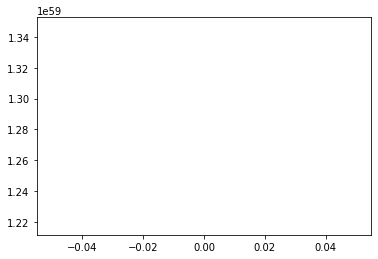

In [41]:
w = initialise_parameter(X_train.shape[1])
w=polynomial_regression_problem(X_train,y,0.1,10, w)

In [42]:
def Polynomial_regression_answer(X_test,Y_test,Y_train,w):
    lenw=X_test.shape[1]
    m_test=X_test.shape[0]
    #X_scaled=scaleMatrix(X_test)
    X_scaled=X_test
    hypothesis=forward_prop(X_scaled,w)
    hypothesis_descaled=descaleMatrix(Y_train,hypothesis)
    cost_test=cost_function(hypothesis_descaled,Y_test)
    return hypothesis_descaled,cost_test
    

In [43]:
hypothesis_descaled,cost_test=Polynomial_regression_answer(X_test,Y,y,w)

In [44]:
def RMSE_error_test(h,y):
    a=np.sqrt((((h-y)**2).sum())/10000)
    return a

In [45]:
def RMSE_error_train(h,y):
    a=np.sqrt((((h-y)**2).sum())/50000)
    return a

In [46]:
RMSE_error_test(hypothesis_descaled,Y)

5.168689757976562e+32